In [1]:
#import all the essential libraries and packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy import stats
from scipy.stats import t, ttest_ind_from_stats
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from pandas.io.json import json_normalize

import datetime
from datetime import datetime, timedelta
import requests
import sys
import json
from bs4 import BeautifulSoup

In [49]:
def last_30_days(date):                                       # function to calculate last 30 days
    date_list = [date - timedelta(days=x) for x in range(30)]
    return sorted(date_list)

def from_date(x):                                           # function to calculate the from_param
    from_date=[]
    for i in range(len(x)):
        from_date.append(last_30_days(datetime.today())[i].date())
    return from_date

def to_date(x):                                         # function to calculate the to_param
    to_date=[]
    for i in range(len(x)):
        to_date.append(last_30_days(datetime.today())[i].date())
    return to_date
    

from_date_list = from_date(last_30_days(datetime.today()))
to_date_list = to_date(last_30_days(datetime.today()))


In [50]:
#Extract 100 articles from each day for past 30 days 

from newsapi import NewsApiClient

url = 'http://newsapi.org/v2/everything?'
newsapi_1 = NewsApiClient(api_key='cf478da0d8784f26877dc94b06b0f8e8')


data_1 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_1.get_everything(q='covid OR coronavirus',language='en',sort_by='relevancy',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_1 = data_1.append(d)

data_1

author  \
0   Beth Skwarecki on Vitals, shared by Beth Skwar...   
1                                         Paige Levin   
2                                                None   
3                                   Harmeet Kaur, CNN   
4                  Tina Burnside and Jason Hanna, CNN   
..                                                ...   
95                                  Reuters Editorial   
96           JOHN LEICESTER and SAMUEL PETREQUIN / AP   
97                insider@insider.com (Susie Neilson)   
98                                  Reuters Editorial   
99                               By\nBen Riley-Smith,   

                                                title  \
0   Can Liquid Chalk Really Double as a Hand Sanit...   
1          Watch the entire CNN coronavirus town hall   
2   Are these coronavirus numbers too good to be t...   
3             Can you get Covid-19 through your eyes?   
4   Florida sets a record for number of coronaviru...   
..                                                ...   
95  Brazil to extend coronavirus economic aid on T...   
96  Tour de France Begins With Strict Anti-COVID-1...   
97  Researchers at the University of Arizona say t...   
98  White House suggests $1.3 trillion coronavirus...   
99  Don't write off Donald Trump's chances of vict...   

                                          description  \
0   To protect ourselves from the coronavirus, the...   
1   CNN's Anderson Cooper and Dr. Sanjay Gupta hos...   
2   Thailand reports that it has crushed Covid-19 ...   
3   We know that the coronavirus can enter the bod...   
4   Florida on Friday marked the fourth consecutiv...   
..                                                ...   
95  Brazil will officially announce on Tuesday the...   
96  The strangest Tour de France ever set off with...   
97  Researchers at the University of Arizona say t...   
98  President Donald Trump is willing to sign a $1...   
99  <ol><li>Don't write off Donald Trump's chances...   

                                                  url  \
0   https://vitals.lifehacker.com/can-liquid-chalk...   
1   https://www.cnn.com/2020/07/30/app-news-sectio...   
2   https://www.cnn.com/videos/world/2020/07/31/th...   
3   https://www.cnn.com/2020/07/31/health/covid-19...   
4   https://www.cnn.com/2020/07/31/health/florida-...   
..                                                ...   
95  https://af.reuters.com/article/worldNews/idAFK...   
96  https://time.com/5884825/tour-de-france-pandemic/   
97  https://news.yahoo.com/researchers-university-...   
98  https://in.reuters.com/article/health-coronavi...   
99  https://www.telegraph.co.uk/news/2020/08/29/do...   

                                           urlToImage           publishedAt  \
0   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T17:30:00Z   
1   https://cdn.cnn.com/cnnnext/dam/assets/2007301...  2020-07-31T02:20:07Z   
2   https://cdn.cnn.com/cnnnext/dam/assets/2007311...  2020-07-31T12:26:13Z   
3   https://cdn.cnn.com/cnnnext/dam/assets/2007311...  2020-07-31T20:50:12Z   
4   https://cdn.cnn.com/cnnnext/dam/assets/2007311...  2020-07-31T19:25:49Z   
..                                                ...                   ...   
95  https://s4.reutersmedia.net/resources/r/?m=02&...  2020-08-29T23:14:00Z   
96  https://api.time.com/wp-content/uploads/2020/0...  2020-08-29T19:19:22Z   
97  https://s.yimg.com/uu/api/res/1.2/QWNDWIH6sBSW...  2020-08-29T11:09:00Z   
98  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29T02:36:00Z   
99  https://www.telegraph.co.uk/content/dam/news/2...  2020-08-29T12:16:00Z   

                                              content source.id  \
0   To protect ourselves from the coronavirus, the...      None   
1                                                None       cnn   
2   Chat with us in Facebook Messenger. Find out w...       cnn   
3                                                None       cnn   
4                      

In [51]:
#Extract 100 articles from each day for past 30 days 

newsapi_2 = NewsApiClient(api_key='b50f5b54f58c4d6f85449b398aad75ed')

data_2 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_2.get_everything(q='covid OR coronavirus',language='en',sort_by='publishedAt',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_2 = data_2.append(d)
data_2

author                                              title  \
0          Carl M. Cannon  COVID Treatment; Nevada Voting; Color and Char...   
1         Jonathan Cooper  McSally, Kelly Move On to Set Up Hot Arizona S...   
2            Froma Harrop                        How America Got So Inferior   
3          Brian Slodysko  Trump Leads July Fundraising, but Biden Closes...   
4          Carl M. Cannon     Casino Gambit; School Closures; A-Bomb Fallout   
..                    ...                                                ...   
95           Abs-cbn News  Jollibee draws long line, as chain opens new s...   
96  Alexandra Del Rosario  Los Angeles Coronavirus Update: L.A. Public He...   
97         Rebekah Barton  ‘Mulan’ to Release on Disney+ for FREE (If You...   
98                    AFP  India eases lockdown restrictions despite surg...   
99        Hamish Cardwell  Health Minister Chris Hipkins confirms Aucklan...   

                                          description  \
0   Good morning. It's Wednesday, Aug. 5, 2020. On...   
1   PHOENIX (AP) - Republican Sen. Martha McSally ...   
2   Europe took dramatic steps to contain the coro...   
3   WASHINGTON (AP) - President Donald Trump took ...   
4   Good morning. It's Thursday, Aug. 6, 2020. On ...   
..                                                ...   
95  A newly opened Jollibee in Plano city, Texas d...   
96  The Los Angeles County Department of Public He...   
97  In a surprising turn of events, The Walt Disne...   
98  The country now has the world's fastest-growin...   
99  The Minister of Health has confirmed that Auck...   

                                                  url  \
0   https://www.realclearpolitics.com/articles/202...   
1   https://www.realclearpolitics.com/articles/202...   
2   https://www.realclearpolitics.com/articles/202...   
3   https://www.realclearpolitics.com/articles/202...   
4   https://www.realclearpolitics.com/articles/202...   
..                                                ...   
95  https://news.abs-cbn.com/business/08/30/20/jol...   
96  https://deadline.com/2020/08/los-angeles-coron...   
97  https://insidethemagic.net/2020/08/mulan-free-...   
98  https://www.freemalaysiatoday.com/category/wor...   
99  https://www.rnz.co.nz/news/national/424786/hea...   

                                           urlToImage           publishedAt  \
0   https://www.realclearpolitics.com/asset/img/ca...  2020-08-01T00:00:00Z   
1   https://assets.realclear.com/images/47/477450_...  2020-08-01T00:00:00Z   
2   https://assets.realclear.com/images/51/517700_...  2020-08-01T00:00:00Z   
3   https://assets.realclear.com/images/51/517772_...  2020-08-01T00:00:00Z   
4   https://www.realclearpolitics.com/asset/img/ca...  2020-08-01T00:00:00Z   
..                                                ...                   ...   
95  https://sa.kapamilya.com/absnews/abscbnnews/me...  2020-08-29T23:20:22Z   
96  https://pmcdeadline2.files.wordpress.com/2020/...  2020-08-29T23:20:16Z   
97  https://insidethemagic-119e2.kxcdn.com/wp-cont...  2020-08-29T23:20:10Z   
98  https://s3media.freemalaysiatoday.com/wp-conte...  2020-08-29T23:19:53Z   
99  https://www.rnz.co.nz/assets/news_crops/108139...  2020-08-29T23:19:32Z   

                                              content source.id  \
0   Good morning. It’s Wednesday, Aug. 5, 2020. On...      None   
1   PHOENIX (AP) — Republican Sen. Martha McSally ...      None   
2   Europe took dramatic steps to contain the coro...      None   
3   WASHINGTON (AP) — President Donald Trump took ...      None   
4   Good morning. It’s Thursday, Aug. 6, 2020. On ...      None   
..                                                ...       ...   
95  MANILA - A newly opened Jollibee in Plano city...      None   
96  The Los Angeles County Department of Public He...      None   
97  In a surprising turn of events, The Walt Disne...      None   
98  Commuters wearing face masks wait for a bus in...      None   
99

In [52]:
#Extract 100 articles from each day for past 30 days 

newsapi_3 = NewsApiClient(api_key='94c52cf4fa594701a4df007e26d08eac')

data_3 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_3.get_everything(q='covid OR coronavirus',language='en',sort_by='popularity',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_3 = data_3.append(d)
data_3

author  \
0   Beth Skwarecki on Vitals, shared by Beth Skwar...   
1                                       Brendan Hesse   
2                                        David Murphy   
3   Kate Dore on Two Cents, shared by Kate Dore to...   
4                                      Elizabeth Yuko   
..                                                ...   
95                                  Reuters Editorial   
96                                  Reuters Editorial   
97                                  Reuters Editorial   
98                                  Reuters Editorial   
99                                  Reuters Editorial   

                                                title  \
0   Can Liquid Chalk Really Double as a Hand Sanit...   
1   If You Won't Wear a Mask to Stop Coronavirus, ...   
2          Why Am I Locked Out of My Netflix Account?   
3    Why the Weak Dollar Is Good for Your Investments   
4   Check Out These Careers You Didn't Know You Co...   
..                                                ...   
95  Influential Libyan interior minister suspended...   
96  Cricket-Australia 'blow cobwebs out' in rain-a...   
97  Cricket: Australia 'blow cobwebs out' in rain-...   
98  Cricket: Australia 'blow cobwebs out' in rain-...   
99  China embassy says Britain is distorting Beiji...   

                                          description  \
0   To protect ourselves from the coronavirus, the...   
1   Facial recognition technology raises ethical d...   
2   Living in quarantine for the past however many...   
3   As the economy struggles, it’s been a rough mo...   
4   When this whole pandemic lockdown business sta...   
..                                                ...   
95  The head of Libya's internationally recognised...   
96  Australian wicketkeeper-batsman Matthew Wade w...   
97  Australian wicketkeeper-batsman Matthew Wade w...   
98  Australian wicketkeeper-batsman Matthew Wade w...   
99  British politicians are twisting facts in orde...   

                                                  url  \
0   https://vitals.lifehacker.com/can-liquid-chalk...   
1   https://lifehacker.com/if-you-wont-wear-a-mask...   
2   https://lifehacker.com/why-am-i-locked-out-of-...   
3   https://twocents.lifehacker.com/why-the-weak-d...   
4   https://lifehacker.com/check-out-these-careers...   
..                                                ...   
95  https://af.reuters.com/article/topNews/idAFKBN...   
96  https://in.reuters.com/article/cricket-austral...   
97  https://uk.reuters.com/article/uk-cricket-aust...   
98  https://in.reuters.com/article/cricket-austral...   
99  https://www.reuters.com/article/us-china-brita...   

                                           urlToImage           publishedAt  \
0   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T17:30:00Z   
1   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T14:00:00Z   
2   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T13:00:00Z   
3   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T16:15:00Z   
4   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T16:30:00Z   
..                                                ...                   ...   
95  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29T09:13:00Z   
96  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T05:36:00Z   
97  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T07:35:00Z   
98  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T06:06:00Z   
99  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T07:13:00Z   

                                              content source.id  \
0   To protect ourselves from the coronavirus, the...      None   
1   Facial recognition technology raises ethical d...      None   
2   Living in quarantine for the past however many...      None   
3   As the economy struggles, its been a rough mon...      None   
4   When this whole pan

In [53]:
# Combine all three datasets to make a large dataframe consisting of all extracted articles
frames = [data_1, data_2, data_3]

all_articles = pd.concat(frames)

all_articles

author  \
0   Beth Skwarecki on Vitals, shared by Beth Skwar...   
1                                         Paige Levin   
2                                                None   
3                                   Harmeet Kaur, CNN   
4                  Tina Burnside and Jason Hanna, CNN   
..                                                ...   
95                                  Reuters Editorial   
96                                  Reuters Editorial   
97                                  Reuters Editorial   
98                                  Reuters Editorial   
99                                  Reuters Editorial   

                                                title  \
0   Can Liquid Chalk Really Double as a Hand Sanit...   
1          Watch the entire CNN coronavirus town hall   
2   Are these coronavirus numbers too good to be t...   
3             Can you get Covid-19 through your eyes?   
4   Florida sets a record for number of coronaviru...   
..                                                ...   
95  Influential Libyan interior minister suspended...   
96  Cricket-Australia 'blow cobwebs out' in rain-a...   
97  Cricket: Australia 'blow cobwebs out' in rain-...   
98  Cricket: Australia 'blow cobwebs out' in rain-...   
99  China embassy says Britain is distorting Beiji...   

                                          description  \
0   To protect ourselves from the coronavirus, the...   
1   CNN's Anderson Cooper and Dr. Sanjay Gupta hos...   
2   Thailand reports that it has crushed Covid-19 ...   
3   We know that the coronavirus can enter the bod...   
4   Florida on Friday marked the fourth consecutiv...   
..                                                ...   
95  The head of Libya's internationally recognised...   
96  Australian wicketkeeper-batsman Matthew Wade w...   
97  Australian wicketkeeper-batsman Matthew Wade w...   
98  Australian wicketkeeper-batsman Matthew Wade w...   
99  British politicians are twisting facts in orde...   

                                                  url  \
0   https://vitals.lifehacker.com/can-liquid-chalk...   
1   https://www.cnn.com/2020/07/30/app-news-sectio...   
2   https://www.cnn.com/videos/world/2020/07/31/th...   
3   https://www.cnn.com/2020/07/31/health/covid-19...   
4   https://www.cnn.com/2020/07/31/health/florida-...   
..                                                ...   
95  https://af.reuters.com/article/topNews/idAFKBN...   
96  https://in.reuters.com/article/cricket-austral...   
97  https://uk.reuters.com/article/uk-cricket-aust...   
98  https://in.reuters.com/article/cricket-austral...   
99  https://www.reuters.com/article/us-china-brita...   

                                           urlToImage           publishedAt  \
0   https://i.kinja-img.com/gawker-media/image/upl...  2020-07-31T17:30:00Z   
1   https://cdn.cnn.com/cnnnext/dam/assets/2007301...  2020-07-31T02:20:07Z   
2   https://cdn.cnn.com/cnnnext/dam/assets/2007311...  2020-07-31T12:26:13Z   
3   https://cdn.cnn.com/cnnnext/dam/assets/2007311...  2020-07-31T20:50:12Z   
4   https://cdn.cnn.com/cnnnext/dam/assets/2007311...  2020-07-31T19:25:49Z   
..                                                ...                   ...   
95  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29T09:13:00Z   
96  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T05:36:00Z   
97  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T07:35:00Z   
98  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T06:06:00Z   
99  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T07:13:00Z   

                                              content source.id  \
0   To protect ourselves from the coronavirus, the...      None   
1                                                None       cnn   
2   Chat with us in Facebook Messenger. Find out w...       cnn   
3                                                None       cnn   
4                      

In [54]:
# Save the combined dataframe as raw file in csv format for later use and documentation purposes
all_articles.to_csv('raw_data/raw_articles_1.csv', index = False)

In [310]:
#to keep the content consistent, let's open the rawfile assigning it to a new name
# I have an old raw_articles files collected 15 days ago, combining both csv's for more articles
df_covid = pd.concat(map(pd.read_csv, ['raw_data/raw_articles.csv', 'raw_data/raw_articles_1.csv']))
df_covid
#df_covid = pd.read_csv('raw_data/raw_articles_1.csv')

author  \
0     https://www.facebook.com/bbcnews   
1                      Nicole Gallucci   
2     https://www.facebook.com/bbcnews   
3                         Jody Serrano   
4                    Reuters Editorial   
...                                ...   
8995                 Reuters Editorial   
8996                 Reuters Editorial   
8997                 Reuters Editorial   
8998                 Reuters Editorial   
8999                 Reuters Editorial   

                                                  title  \
0     Coronavirus: Three generations of Bollywood Ba...   
1     COVID-19 patient's last words to nurse: 'I tho...   
2     Coronavirus: South Africa bans alcohol sales a...   
3     Florida Records 15,000 New Covid-19 Cases in a...   
4     Bollywood's Bachchan tests positive for COVID-...   
...                                                 ...   
8995  Influential Libyan interior minister suspended...   
8996  Cricket-Australia 'blow cobwebs out' in rain-a...   
8997  Cricket: Australia 'blow cobwebs out' in rain-...   
8998  Cricket: Australia 'blow cobwebs out' in rain-...   
8999  China embassy says Britain is distorting Beiji...   

                                            description  \
0     Actress Aishwarya Rai Bachchan, her father-in-...   
1     As people across the United States continue to...   
2     It is one of several restrictions introduced b...   
3     Florida broke the nation’s covid-19 single-day...   
4     India's most famous actor, Amitabh Bachchan, a...   
...                                                 ...   
8995  The head of Libya's internationally recognised...   
8996  Australian wicketkeeper-batsman Matthew Wade w...   
8997  Australian wicketkeeper-batsman Matthew Wade w...   
8998  Australian wicketkeeper-batsman Matthew Wade w...   
8999  British politicians are twisting facts in orde...   

                                                    url  \
0     https://www.bbc.co.uk/news/world-asia-india-53...   
1     https://mashable.com/article/coronavirus-patie...   
2      https://www.bbc.co.uk/news/world-africa-53382797   
3     https://gizmodo.com/florida-records-15-000-new...   
4       https://www.reuters.com/video/watch/idOVCMIEUL9   
...                                                 ...   
8995  https://af.reuters.com/article/topNews/idAFKBN...   
8996  https://in.reuters.com/article/cricket-austral...   
8997  https://uk.reuters.com/article/uk-cricket-aust...   
8998  https://in.reuters.com/article/cricket-austral...   
8999  https://www.reuters.com/article/us-china-brita...   

                                             urlToImage           publishedAt  \
0     https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12T14:04:34Z   
1     https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12T18:31:26Z   
2     https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12T20:43:26Z   
3     https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12T19:34:00Z   
4     https://static.reuters.com/resources/r/?d=2020...  2020-07-12T13:18:42Z   
...                                                 ...                   ...   
8995  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29T09:13:00Z   
8996  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T05:36:00Z   
8997  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T07:35:00Z   
8998  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T06:06:00Z   
8999  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29T07:13:00Z   

                                                content source.id  source.name  
0     Image copyrightReutersImage caption\r\n Abhish...  bbc-news     BBC News  
1     As people across the United States continue to...  mashable     Mashable  
2     Image copyrightAFPImage caption\r\n This is th...  bbc-news     BBC News  
3     Florida broke the nations covid-19 single-day ...       NaN  Gizmodo.com  
4     Posted \r\nIndia

In [311]:
#change the publication date into something more readable
df_covid['publishedAt'] = pd.to_datetime(df_covid['publishedAt']).apply(lambda x: x.date())

In [312]:
#check the number of duplicate articles based on the url column
print("Number of Duplicate Articles:")
print(df_covid.duplicated(subset='url').sum())

Number of Duplicate Articles:
6279


In [313]:
#drop any duplicates from the dataframe by keeping the first occurence of it
df_covid.drop_duplicates(subset='url', keep = "first", inplace = True)
df_covid.shape

(11721, 9)

In [314]:
# Let's check all the columns using info; looks like some columns have null values
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11721 entries, 0 to 8999
Data columns (total 9 columns):
author         10659 non-null object
title          11720 non-null object
description    11641 non-null object
url            11721 non-null object
urlToImage     11117 non-null object
publishedAt    11721 non-null object
content        11193 non-null object
source.id      5750 non-null object
source.name    11721 non-null object
dtypes: object(9)
memory usage: 915.7+ KB


In [315]:
#Looks are there are null values from most of the columns, but content and description column are the most important for future analysis
df_covid.isna().sum() 

author         1062
title             1
description      80
url               0
urlToImage      604
publishedAt       0
content         528
source.id      5971
source.name       0
dtype: int64

In [316]:
# We will be using text from title, description, and also content columns
# Let's drop the rows that has no content or description, as we cannot generate much text from those

df_covid = df_covid.dropna(subset = ['content', 'description']) 
print("Shape of the final dataset:")
df_covid.shape

Shape of the final dataset:


(11161, 9)

In [317]:
# For some feature engineering adding word count columns for both description and content can be useful parameters later:

df_covid['descr_word_count']=df_covid['description'].apply(lambda x: len(x.strip().split()))  # word count in description
df_covid['descr_unique_words']=df_covid['description'].apply(lambda x:len(set(str(x).split()))) # number of unique words in description
df_covid['content_word_count']=df_covid['content'].apply(lambda x: len(x.strip().split()))  # word count in content
df_covid['content_unique_words']=df_covid['content'].apply(lambda x:len(set(str(x).split()))) # number of unique words in content

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [318]:
#Let's take a look at the data and new columns
df_covid.head(10)

author  \
0  https://www.facebook.com/bbcnews   
1                   Nicole Gallucci   
2  https://www.facebook.com/bbcnews   
3                      Jody Serrano   
4                 Reuters Editorial   
5                 Reuters Editorial   
6                 Reuters Editorial   
7                       Nupur Anand   
8             HT Entertainment Desk   
9                       Lidia Kelly   

                                               title  \
0  Coronavirus: Three generations of Bollywood Ba...   
1  COVID-19 patient's last words to nurse: 'I tho...   
2  Coronavirus: South Africa bans alcohol sales a...   
3  Florida Records 15,000 New Covid-19 Cases in a...   
4  Bollywood's Bachchan tests positive for COVID-...   
5  Safety first for Spaniards voting amid new cor...   
6  NHL clubs ordered not to release COVID-19 or i...   
7  Bollywood's Bachchan family hit by coronavirus...   
8  Priyanka Chopra sends prayers to Amitabh Bachc...   
9  Australia's Victoria state marks week of tripl...   

                                         description  \
0  Actress Aishwarya Rai Bachchan, her father-in-...   
1  As people across the United States continue to...   
2  It is one of several restrictions introduced b...   
3  Florida broke the nation’s covid-19 single-day...   
4  India's most famous actor, Amitabh Bachchan, a...   
5  Voters in northern Spain wore face masks and u...   
6  The NHL announced on Saturday that teams will ...   
7  Three generations of Bollywood's Bachchan fami...   
8  <ol><li>Priyanka Chopra sends prayers to Amita...   
9  Australia's Victoria state reported 273 new ca...   

                                                 url  \
0  https://www.bbc.co.uk/news/world-asia-india-53...   
1  https://mashable.com/article/coronavirus-patie...   
2   https://www.bbc.co.uk/news/world-africa-53382797   
3  https://gizmodo.com/florida-records-15-000-new...   
4    https://www.reuters.com/video/watch/idOVCMIEUL9   
5  https://www.reuters.com/article/us-spain-polit...   
6  https://www.reuters.com/article/us-icehockey-n...   
7  https://www.reuters.com/article/us-health-coro...   
8  https://www.hindustantimes.com/bollywood/priya...   
9  https://www.reuters.com/article/us-health-coro...   

                                          urlToImage publishedAt  \
0  https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
1  https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12   
2  https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
3  https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12   
4  https://static.reuters.com/resources/r/?d=2020...  2020-07-12   
5  https://s1.reutersmedia.net/resources/r/?m=02&...  2020-07-12   
6  https://s1.reutersmedia.net/resources/r/?m=02&...  2020-07-12   
7  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-07-12   
8  https://www.hindustantimes.com/rf/image_size_9...  2020-07-12   
9  https://s4.reutersmedia.net/resources/r/?m=02&...  2020-07-12   

                                             content source.id  \
0  Image copyrightReutersImage caption\r\n Abhish...  bbc-news   
1  As people across the United States continue to...  mashable   
2  Image copyrightAFPImage caption\r\n This is th...  bbc-news   
3  Florida broke the nations covid-19 single-day ...       NaN   
4  Posted \r\nIndia's most famous actor, Amitabh ...   reuters   
5  BILBAO (Reuters) - Voters in northern Spain wo...   reuters   
6  The NHL announced on Saturday that teams will ...   reuters   
7  MUMBAI (Reuters) - Three generations of Bollyw...   reuters   
8  Actors Priyanka Chopra, Tiger Shroff and other...       NaN   
9  MELBOURNE (Reuters) - Australia’s Victoria sta...   reuters   

       source.name  descr_word_count  descr_unique_words  content_word_count  \
0         BBC News                13                  13                  29   
1         Mashable                41                  38                  32   
2         BBC News              

In [319]:
#Newsapi sources endpoint allows you to map each data source to its category. 
#Let's use this information as an additional feature in our dataset. This may be useful later.
d = {}
response = requests.get('https://newsapi.org/v2/sources?&apiKey=cf478da0d8784f26877dc94b06b0f8e8')
response = response.json()
for s in response['sources']:
    d[s['name']] = s['category'] 
# I am choosing to match the category with the name, as source.name column did not have any null values
d

{'ABC News': 'general',
 'ABC News (AU)': 'general',
 'Aftenposten': 'general',
 'Al Jazeera English': 'general',
 'ANSA.it': 'general',
 'Argaam': 'business',
 'Ars Technica': 'technology',
 'Ary News': 'general',
 'Associated Press': 'general',
 'Australian Financial Review': 'business',
 'Axios': 'general',
 'BBC News': 'general',
 'BBC Sport': 'sports',
 'Bild': 'general',
 'Blasting News (BR)': 'general',
 'Bleacher Report': 'sports',
 'Bloomberg': 'business',
 'Breitbart News': 'general',
 'Business Insider': 'business',
 'Business Insider (UK)': 'business',
 'Buzzfeed': 'entertainment',
 'CBC News': 'general',
 'CBS News': 'general',
 'CNN': 'general',
 'CNN Spanish': 'general',
 'Crypto Coins News': 'technology',
 'Der Tagesspiegel': 'general',
 'Die Zeit': 'business',
 'El Mundo': 'general',
 'Engadget': 'technology',
 'Entertainment Weekly': 'entertainment',
 'ESPN': 'sports',
 'ESPN Cric Info': 'sports',
 'Financial Post': 'business',
 'Focus': 'general',
 'Football Italia':

In [320]:
# function to map source name to its category
def category(source, m):
    try:
        return m[source]
    except:
        return 'Source not listed'

df_covid['category'] = df_covid['source.name'].map(lambda s: category(s, d))

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [321]:
# Exploring the new dataset
df_covid

author  \
0     https://www.facebook.com/bbcnews   
1                      Nicole Gallucci   
2     https://www.facebook.com/bbcnews   
3                         Jody Serrano   
4                    Reuters Editorial   
...                                ...   
8995                 Reuters Editorial   
8996                 Reuters Editorial   
8997                 Reuters Editorial   
8998                 Reuters Editorial   
8999                 Reuters Editorial   

                                                  title  \
0     Coronavirus: Three generations of Bollywood Ba...   
1     COVID-19 patient's last words to nurse: 'I tho...   
2     Coronavirus: South Africa bans alcohol sales a...   
3     Florida Records 15,000 New Covid-19 Cases in a...   
4     Bollywood's Bachchan tests positive for COVID-...   
...                                                 ...   
8995  Influential Libyan interior minister suspended...   
8996  Cricket-Australia 'blow cobwebs out' in rain-a...   
8997  Cricket: Australia 'blow cobwebs out' in rain-...   
8998  Cricket: Australia 'blow cobwebs out' in rain-...   
8999  China embassy says Britain is distorting Beiji...   

                                            description  \
0     Actress Aishwarya Rai Bachchan, her father-in-...   
1     As people across the United States continue to...   
2     It is one of several restrictions introduced b...   
3     Florida broke the nation’s covid-19 single-day...   
4     India's most famous actor, Amitabh Bachchan, a...   
...                                                 ...   
8995  The head of Libya's internationally recognised...   
8996  Australian wicketkeeper-batsman Matthew Wade w...   
8997  Australian wicketkeeper-batsman Matthew Wade w...   
8998  Australian wicketkeeper-batsman Matthew Wade w...   
8999  British politicians are twisting facts in orde...   

                                                    url  \
0     https://www.bbc.co.uk/news/world-asia-india-53...   
1     https://mashable.com/article/coronavirus-patie...   
2      https://www.bbc.co.uk/news/world-africa-53382797   
3     https://gizmodo.com/florida-records-15-000-new...   
4       https://www.reuters.com/video/watch/idOVCMIEUL9   
...                                                 ...   
8995  https://af.reuters.com/article/topNews/idAFKBN...   
8996  https://in.reuters.com/article/cricket-austral...   
8997  https://uk.reuters.com/article/uk-cricket-aust...   
8998  https://in.reuters.com/article/cricket-austral...   
8999  https://www.reuters.com/article/us-china-brita...   

                                             urlToImage publishedAt  \
0     https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
1     https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12   
2     https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
3     https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12   
4     https://static.reuters.com/resources/r/?d=2020...  2020-07-12   
...                                                 ...         ...   
8995  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29   
8996  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
8997  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
8998  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
8999  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   

                                                content source.id  \
0     Image copyrightReutersImage caption\r\n Abhish...  bbc-news   
1     As people across the United States continue to...  mashable   
2     Image copyrightAFPImage caption\r\n This is th...  bbc-news   
3     Florida broke the nations covid-19 single-day ...       NaN   
4     Posted \r\nIndia's most famous actor, Amitabh ...   reuters   
...                                                 ...       ...   
8995  TRIPOLI (Reuters) - The head of Libya’s intern...   reuter

In [322]:
# After processing the raw data and adding the extra features a columns, save the processed data in a csv format for documentation
df_covid.to_csv('processed_data/processed_articles.csv', index = False)

In [323]:
#to keep the content consistent, let's open the processed file assigning it to a new name
df_processed = pd.read_csv('processed_data/processed_articles.csv')

In [324]:
df_processed.describe()

descr_word_count  descr_unique_words  content_word_count  \
count      11161.000000        11161.000000        11161.000000   
mean          31.119255           28.273900           33.639280   
std           10.145696            8.588824            4.384374   
min            2.000000            2.000000            2.000000   
25%           24.000000           22.000000           32.000000   
50%           33.000000           30.000000           34.000000   
75%           39.000000           35.000000           36.000000   
max           53.000000           48.000000           45.000000   

       content_unique_words  
count          11161.000000  
mean              31.085566  
std                3.992099  
min                2.000000  
25%               30.000000  
50%               32.000000  
75%               33.000000  
max               41.000000

In [325]:
# Let's check how many rows did not have any category assigned due to source not being listed in the newsapi
(df_processed['category'] == 'Source not listed').sum()

5635

### Looks like more than half the dataset had news articles from sources that were not listed in the newsapi sources endpoint. To get a general idea of the content of the articles let's check the distribution of the different categories across the dataset.

Text(0.5, 1.0, 'Distribution of Categories across the dataset')

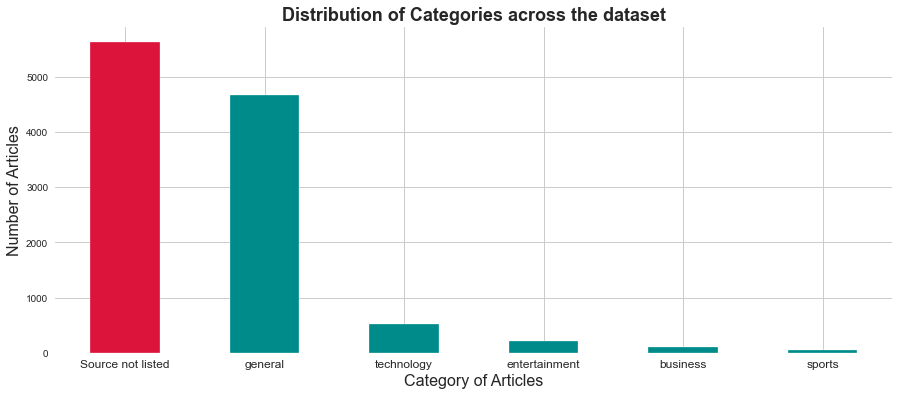

In [326]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
df_processed['category'].value_counts().plot(kind='bar', figsize=(15, 6), color=['crimson', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan'])
plt.xlabel("Category of Articles", fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("Number of Articles", fontsize=16)
plt.title("Distribution of Categories across the dataset", fontsize=18, weight='bold')

#### As evident from the bar plot, most of the sources for the articles were not listed as part of the NewsAPI sources endpoint. Many mixed topics are included in the "general" category which is the largest catergory for our articles dataset. This only gives us a high level idea of our dataset, a very superficial classification of the news. It does not tell us the underlying topics or the most relevant news per each category.

#### To analyze the articles deeper, we will have to process the descriptions and contents of each article since the words in the articles naturally carry more meaning.

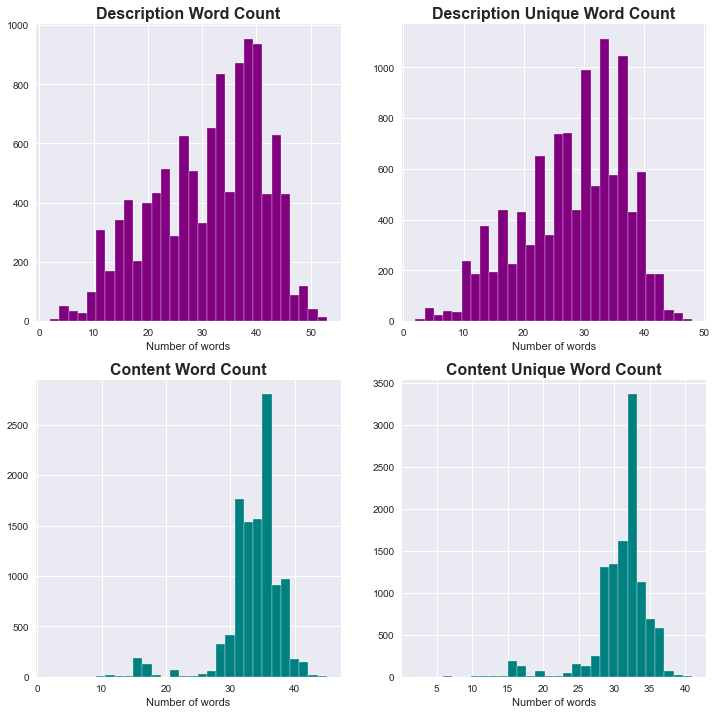

In [327]:
# The description column gives a description or snippet from the article 
# and the content column gives the unformatted content of the article truncated to 200 chars.
# Let's now check the disctribution of the word counts for the description and content columns.
plt.style.use('seaborn')
fig= plt.figure(figsize=(12,12))

ax1 = plt.subplot(221)
plt.hist(df_processed.descr_word_count, bins=30, color='purple')
plt.title('Description Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(222)
plt.hist(df_processed.descr_unique_words, bins=30, color='purple')
plt.title('Description Unique Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(223)
plt.hist(df_processed.content_word_count, bins=30, color='teal')
plt.title('Content Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(224)
plt.hist(df_processed.content_unique_words, bins=30, color='teal')
plt.title('Content Unique Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

plt.show()

##### From the above graphs, we can see the distribution of the words counts in both description and content columns which are our columns of interest for further analysis. The description column has a wider range of word counts anywhere from 10 to 45 words. The description column length and word count is dependent on article to article as in what snippet from the article is provided by the NewsApi. Whereas the content column is already truncated to 200 characters by NewsApi and hence we see narrow range of word counts anywhere between 30 to 40 words.

##### The interesting and useful part is that the unique words count column for both description and content are almost similar to their respective word count columns. This means even though we have limited content due to restrictions of the free version of NewsApi, most of the content provided is useful which will help a lot in our further analysis of articles.


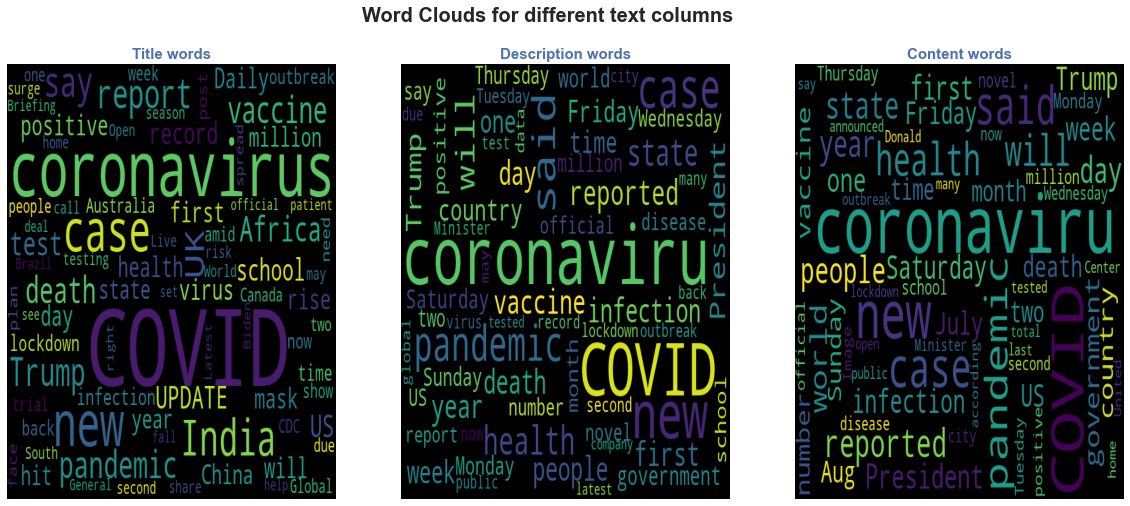

In [328]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('chars')
stopwords.add('Reuters')
stopwords.add('li')
stopwords.add('ha')
stopwords.add('char')
stopwords.add('ol')
    
title_words = ''
for i in df_processed.title:
    i = str(i)
    seperate = i.split()
    title_words += " ".join(seperate)+" "
    
descr_words = ''
for i in df_processed.description:
    i = str(i)
    seperate = i.split()
    descr_words += " ". join(seperate)+" "
    
content_words = ''
for i in df_processed.content:
    i = str(i)
    seperate = i.split()
    content_words += " ".join(seperate)+" "

    
wordcloud1 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(title_words)

wordcloud2 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(descr_words)

wordcloud3 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(content_words)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Word Clouds for different text columns', weight='bold', fontsize=20)

ax1.set_title('Title words', weight='bold', fontsize=15, color='b')
im1 = ax1.imshow(wordcloud1, aspect='auto')
ax1.axis("off")

ax2.set_title('Description words', weight='bold', fontsize=15, color='b')
im2 = ax2.imshow(wordcloud2, aspect='auto')
ax2.axis("off")


ax3.set_title('Content words', weight='bold', fontsize=15, color='b')
im3 = ax3.imshow(wordcloud3, aspect='auto')
ax3.axis("off")

plt.show()

##### From the above wordclouds of different text columns from the dataset we see that as expected all articles are related to covid or coronavirus or pandemic. We can also see names of different countries indicating articles covering world updates with some data and records. Also possible articles about vaccines and political leaders. Now that we have an idea of what kind of articles we have in the dataset, lets dig deeper to by some text pre-processing steps 

## Data Pre-processing and Tokenization

In [329]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity, linear_kernel
import gensim

In [330]:
df_processed['combined_text'] = df_processed['content'].map(str) + df_processed['title'].map(str) + df_processed['description'].map(str)

In [331]:
df_processed.head()

author  \
0  https://www.facebook.com/bbcnews   
1                   Nicole Gallucci   
2  https://www.facebook.com/bbcnews   
3                      Jody Serrano   
4                 Reuters Editorial   

                                               title  \
0  Coronavirus: Three generations of Bollywood Ba...   
1  COVID-19 patient's last words to nurse: 'I tho...   
2  Coronavirus: South Africa bans alcohol sales a...   
3  Florida Records 15,000 New Covid-19 Cases in a...   
4  Bollywood's Bachchan tests positive for COVID-...   

                                         description  \
0  Actress Aishwarya Rai Bachchan, her father-in-...   
1  As people across the United States continue to...   
2  It is one of several restrictions introduced b...   
3  Florida broke the nation’s covid-19 single-day...   
4  India's most famous actor, Amitabh Bachchan, a...   

                                                 url  \
0  https://www.bbc.co.uk/news/world-asia-india-53...   
1  https://mashable.com/article/coronavirus-patie...   
2   https://www.bbc.co.uk/news/world-africa-53382797   
3  https://gizmodo.com/florida-records-15-000-new...   
4    https://www.reuters.com/video/watch/idOVCMIEUL9   

                                          urlToImage publishedAt  \
0  https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
1  https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12   
2  https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
3  https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12   
4  https://static.reuters.com/resources/r/?d=2020...  2020-07-12   

                                             content source.id  source.name  \
0  Image copyrightReutersImage caption\r\n Abhish...  bbc-news     BBC News   
1  As people across the United States continue to...  mashable     Mashable   
2  Image copyrightAFPImage caption\r\n This is th...  bbc-news     BBC News   
3  Florida broke the nations covid-19 single-day ...       NaN  Gizmodo.com   
4  Posted \r\nIndia's most famous actor, Amitabh ...   reuters      Reuters   

   descr_word_count  descr_unique_words  content_word_count  \
0                13                  13                  29   
1                41                  38                  32   
2                14                  14                  31   
3                42                  35                  34   
4                20                  20                  21   

   content_unique_words           category  \
0                    29            general   
1                    30      entertainment   
2                    27            general   
3                    30  Source not listed   
4                    21            general   

                                       combined_text  
0  Image copyrightReutersImage caption\r\n Abhish...  
1  As people across the United States continue to...  
2  Image copyrightAFPImage caption\r\n This is th...  
3  Florida broke the nations covid-19 single-day ...  
4  Posted \r\nIndia's most famous actor, Amitabh ...

In [332]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub(r'\b\w{,2}\b', ' ', text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [333]:
import re
import nltk
nltk.download('stopwords')
additional_stop_words = ['chars', 'reuters', 'char', 'image', 'copyrightreutersimage', 'copyrightafpimage', 'caption', 'coronavirus', 'covid', 'pandemic']
stoplist = stopwords.words('english') + list(punctuation) + additional_stop_words

tokenizer = RegexpTokenizer(r'\w+')
def tokenize(text):
    results = []
    text = clean_text(text)
    for token in tokenizer.tokenize(text):
        if token not in stoplist:
            results.append(token)
    return results
    #[token for token in tokenizer.tokenize(x) if token not in stoplist]
    #return tokenizer.tokenize(x)

#token for token in word_tokenize(text) if token not in stoplist

df_processed['tokens'] = df_processed['combined_text'].map(tokenize)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asha2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [334]:
for combined_text, tokens in zip(df_processed['combined_text'].head(5), df_processed['tokens'].head(5)):
    print('combined_text:', combined_text)
    print('tokens:', tokens)
    print()

combined_text: Image copyrightReutersImage caption
 Abhishek (L) said his wife and daughter would self-isolate at home
Three generations of a high-profile Bollywood family have tested positive for Covid-19, offic… [+3432 chars]Coronavirus: Three generations of Bollywood Bachchan family infectedActress Aishwarya Rai Bachchan, her father-in-law, husband and daughter test positive for Covid-19.
tokens: ['abhishek', 'said', 'wife', 'daughter', 'would', 'self', 'isolate', 'home', 'three', 'generations', 'high', 'profile', 'bollywood', 'family', 'tested', 'positive', 'offic', 'three', 'generations', 'bollywood', 'bachchan', 'family', 'infectedactress', 'aishwarya', 'rai', 'bachchan', 'father', 'law', 'husband', 'daughter', 'test', 'positive']

combined_text: As people across the United States continue to ignore the severity of the coronavirus pandemic, medical professionals like Jane Appleby, Chief Medical Officer at Methodist Hospital in San Antonio, Te… [+2506 chars]COVID-19 patient's last

In [335]:
import nltk
nltk.download('wordnet')
def stemmer(x): 
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in x])
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asha2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [336]:
df_processed['lems'] = df_processed['tokens'].map(lemmatize)
df_processed['stems'] = df_processed['tokens'].map(stemmer)

In [337]:
df_processed

author  \
0      https://www.facebook.com/bbcnews   
1                       Nicole Gallucci   
2      https://www.facebook.com/bbcnews   
3                          Jody Serrano   
4                     Reuters Editorial   
...                                 ...   
11156                 Reuters Editorial   
11157                 Reuters Editorial   
11158                 Reuters Editorial   
11159                 Reuters Editorial   
11160                 Reuters Editorial   

                                                   title  \
0      Coronavirus: Three generations of Bollywood Ba...   
1      COVID-19 patient's last words to nurse: 'I tho...   
2      Coronavirus: South Africa bans alcohol sales a...   
3      Florida Records 15,000 New Covid-19 Cases in a...   
4      Bollywood's Bachchan tests positive for COVID-...   
...                                                  ...   
11156  Influential Libyan interior minister suspended...   
11157  Cricket-Australia 'blow cobwebs out' in rain-a...   
11158  Cricket: Australia 'blow cobwebs out' in rain-...   
11159  Cricket: Australia 'blow cobwebs out' in rain-...   
11160  China embassy says Britain is distorting Beiji...   

                                             description  \
0      Actress Aishwarya Rai Bachchan, her father-in-...   
1      As people across the United States continue to...   
2      It is one of several restrictions introduced b...   
3      Florida broke the nation’s covid-19 single-day...   
4      India's most famous actor, Amitabh Bachchan, a...   
...                                                  ...   
11156  The head of Libya's internationally recognised...   
11157  Australian wicketkeeper-batsman Matthew Wade w...   
11158  Australian wicketkeeper-batsman Matthew Wade w...   
11159  Australian wicketkeeper-batsman Matthew Wade w...   
11160  British politicians are twisting facts in orde...   

                                                     url  \
0      https://www.bbc.co.uk/news/world-asia-india-53...   
1      https://mashable.com/article/coronavirus-patie...   
2       https://www.bbc.co.uk/news/world-africa-53382797   
3      https://gizmodo.com/florida-records-15-000-new...   
4        https://www.reuters.com/video/watch/idOVCMIEUL9   
...                                                  ...   
11156  https://af.reuters.com/article/topNews/idAFKBN...   
11157  https://in.reuters.com/article/cricket-austral...   
11158  https://uk.reuters.com/article/uk-cricket-aust...   
11159  https://in.reuters.com/article/cricket-austral...   
11160  https://www.reuters.com/article/us-china-brita...   

                                              urlToImage publishedAt  \
0      https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
1      https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12   
2      https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
3      https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12   
4      https://static.reuters.com/resources/r/?d=2020...  2020-07-12   
...                                                  ...         ...   
11156  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29   
11157  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11158  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11159  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11160  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   

                                                 content source.id  \
0      Image copyrightReutersImage caption\r\n Abhish...  bbc-news   
1      As people across the United States continue to...  mashable   
2      Image copyrightAFPImage caption\r\n This is th...  bbc-news   
3      Florida broke the nations covid-19 single-day ...       NaN   
4      Posted \r\nIndia's most famous actor, Amitabh ...   reuters   
...                                                  ...       ...  

#### Let's group the tokens by category and get top 10 most frequent tokens/keywords. Keywords are the most relevant words that are associated with a particular piece of content. The code below extracts keywords from the tokens column relevant to each category

In [338]:
from collections import Counter

def keywords(category):
    tokens = df_processed[df_processed['category'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        #if token_list != ['covid', 'coronavirus']:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

for category in set(df_processed['category']):
    print('category :', category)
    print('top 10 keywords:', keywords(category))
    print('\n')

category : sports
top 10 keywords: [('players', 22), ('transfer', 19), ('league', 17), ('season', 15), ('open', 15), ('talk', 15), ('first', 13), ('team', 12), ('nfl', 12), ('positive', 11)]


category : general
top 10 keywords: [('cases', 2634), ('new', 2618), ('said', 2413), ('reported', 1263), ('health', 1185), ('infections', 962), ('country', 873), ('saturday', 871), ('friday', 786), ('government', 781)]


category : technology
top 10 keywords: [('new', 219), ('company', 165), ('startup', 120), ('today', 104), ('one', 103), ('year', 86), ('announced', 83), ('world', 82), ('people', 81), ('first', 80)]


category : entertainment
top 10 keywords: [('trump', 81), ('new', 64), ('face', 49), ('like', 45), ('masks', 43), ('many', 41), ('one', 38), ('mask', 35), ('world', 34), ('would', 34)]


category : business
top 10 keywords: [('new', 66), ('cases', 58), ('people', 45), ('trump', 45), ('reported', 38), ('vaccine', 33), ('said', 29), ('news', 27), ('president', 26), ('healthcare', 25)]

##### Extracting the top 10 frequent words per category can point to important categories. From the above list we can say that sports category has articles relating to covid dealing with nlf, transfer, players and league etc. Technology category has articles related to covid covering startups and company etc., whereas business category has trump, reported keywords etc. pointing in the right direction. Other generic categories includes articles about vaccines, health, and masks etc.

##### Even after pre-processing the text and removing the stop words, we still see lot of generic words like year, new, us, and people that doesnt carry much meaning.

#### So we will be using tf-idf as out next step to prevent the above situation

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,2))
text = list(df_processed['tokens'].map(lambda tokens: ' '.join(tokens)))
X = vectorizer.fit_transform(text)
X.shape

(11161, 13799)

In [340]:
#Let's create a dictionary mapping the tokens of their tfidf values

tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

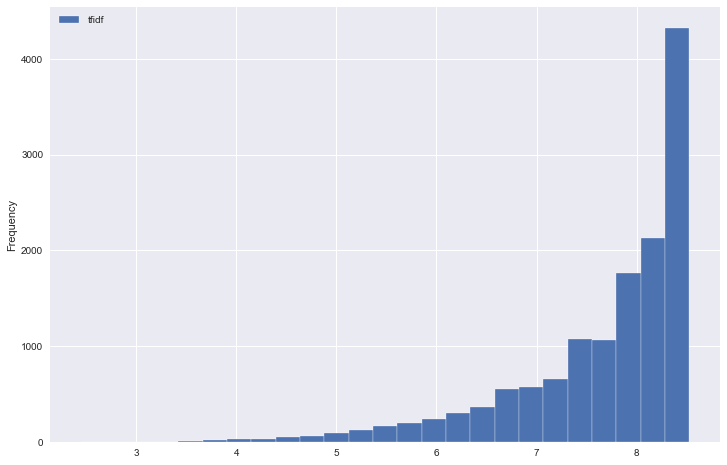

In [341]:
tfidf.plot(kind='hist', bins=25, figsize=(12,8))

In [342]:
def plot_word_cloud(terms, header):
    text = terms.index
    text = ' '.join(list(text))
    wordcloud = WordCloud(max_font_size=30).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(header, fontsize=30)
    plt.axis("off")
    plt.show()

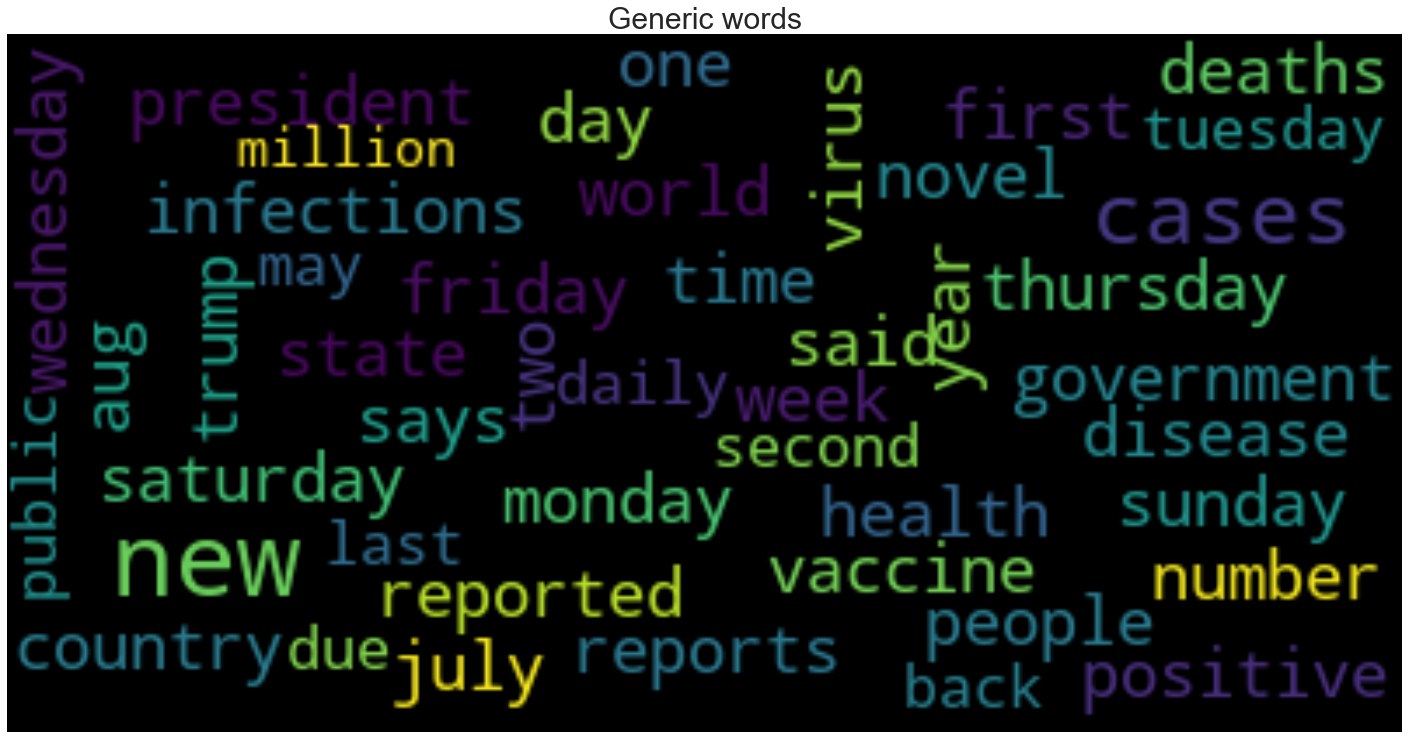

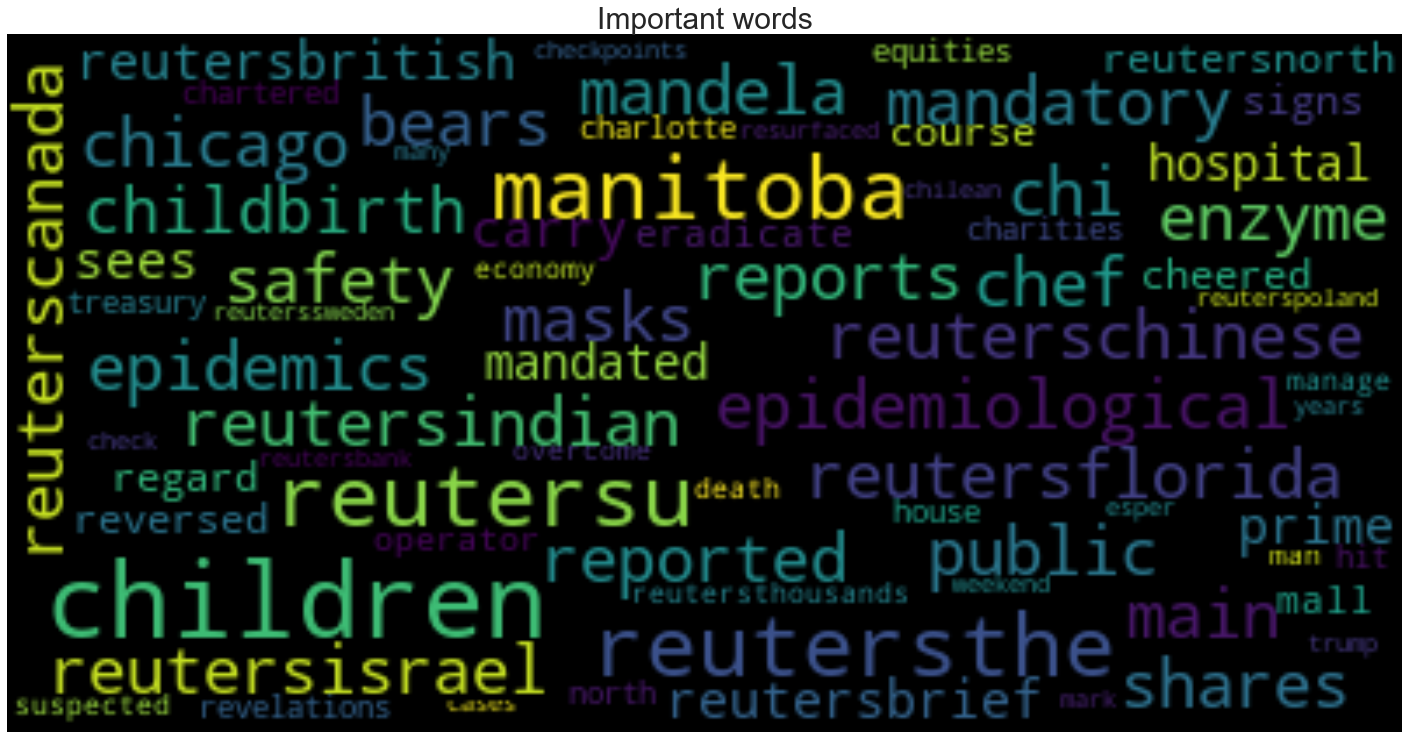

In [343]:
wordcloud1 = plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(50), 'Generic words')

wordcloud2 = plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(50), 'Important words')


As we can see from the wordclouds, the lowest tfidf scores gives us very generic words as these are the most common words found across all combined_text. Words like people, day, week, cases, deaths, virus etc. got a low score as a penalty for not being relevant.

The 'Important words' wordclouds shows us the less common words that carry more meaning in outlining the underlying topics.

Let's reduce the 14000 something features/dimensions by PCA dimentionality reduction to do some clustering.

In [344]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(11161, 5234)

In [345]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

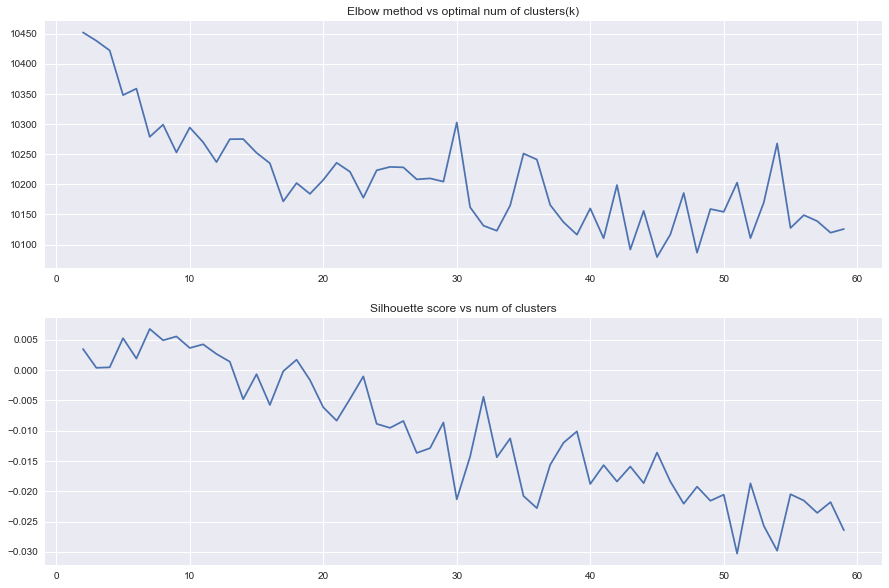

In [346]:
inertias = []
sil_scores = []
k_max = 60
for k in range(2, k_max):
    k_means = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
    k_means.fit(X_reduced)
    sil_score = silhouette_score(X_reduced, k_means.labels_)
    sil_scores.append(sil_score)
    inertias.append(k_means.inertia_)


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.plot(range(2, k_max), inertias)
ax1.set_title('Elbow method vs optimal num of clusters(k)')
ax1.grid(True)

ax2.plot(range(2, k_max), sil_scores)
ax2.set_title('Silhouette score vs num of clusters')
ax2.grid(True)


In this plot we can see that the better k values after 20 does not change much. After that, the decrease in distortion is not as significant. Taking the inertias and silhouette score in consideration, we will use k=20.

In [347]:
k = 20

k_means_model = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
k_means = k_means_model.fit(X_reduced)
k_means_clusters = k_means.predict(X_reduced)
df_processed['clusters'] = k_means_clusters

In [348]:
# Let's look at the keywords that describe each cluster

centroids = k_means.cluster_centers_.argsort()[:, ::-1]
key_terms = vectorizer.get_feature_names()
all_keywords = []
for i in range(k):
    topic_keywords = []
    for j in centroids[i, :10]:
        topic_keywords.append(key_terms[j])
    all_keywords.append(topic_keywords)

keywords_df = pd.DataFrame(index=['cluster_{0}'.format(i) for i in range(k)], 
                           columns=['keyword_{0}'.format(i) for i in range(10)],
                           data=all_keywords)
keywords_df
    

keyword_0           keyword_1             keyword_2  \
cluster_0             advocates           aggregate              abc news   
cluster_1                 aaron   abhishek bachchan              abhishek   
cluster_2                abbott            abc news   abbott laboratories   
cluster_3                abbott            aberdeen               abating   
cluster_4                 aaron          absolutely                abroad   
cluster_5                 aaron          absolutely                abrupt   
cluster_6   abbott laboratories            asuncion                  arts   
cluster_7             abandoned              abbott              aberdeen   
cluster_8               ability                acce                adding   
cluster_9                 ababa           abandoned              abc news   
cluster_10                aaron              aboard         across nation   
cluster_11               abbott            abc news              accepted   
cluster_12        according new              accept            accidental   
cluster_13                aaron             ability                aboard   
cluster_14                  abc   abhishek bachchan                 ababa   
cluster_15       access trusted  acceptance summary  according government   
cluster_16              abandon           abandoned                 ababa   
cluster_17             abc news       accommodation                 abuse   
cluster_18           accelerate            absentee               academy   
cluster_19             activist          accessible           acquisition   

                    keyword_3             keyword_4            keyword_5  \
cluster_0   announced tuesday                active                agent   
cluster_1              abbott                 abuse            abandoned   
cluster_2            abattoir               abating               abrupt   
cluster_3            abattoir               ability    abhishek bachchan   
cluster_4              abbott                 abuja            abandoned   
cluster_5              abroad                 abuja                  abu   
cluster_6                camp             ahead new          agency said   
cluster_7               abuse               ability               abroad   
cluster_8        adds details     acute respiratory               absent   
cluster_9              abbott               ability                 able   
cluster_10           activity           accelerated        across canada   
cluster_11       accelerating            accidental           acceptance   
cluster_12           abruptly       according state  according statement   
cluster_13           abhishek             abandoned                  abc   
cluster_14            absence               abating               aboard   
cluster_15             abbott                adrian             abc news   
cluster_16                abc              abc news               abrupt   
cluster_17     according data              aberdeen      according state   
cluster_18          academics          accelerating                  abo   
cluster_19             acting  according government                adopt   

                     keyword_6         keyword_7            keyword_8  \
cluster_0             adds new     across europe         adopted euro   
cluster_1             abc news       accelerated   according official   
cluster_2             abhishek           abandon              ability   
cluster_3               abrupt           abandon               abroad   
cluster_4               abrupt              acce    abhishek bachchan   
cluster_5           acceptance         activated          active case   
cluster_6         biotech firm          billions         avoid public   
cluster_7               absent            accept                  abu   
cluster_8        among younger             alone                  bag   
cluster_9                  acc       alex castro   according research   
clus

Let's look at some clusters, and try to summarize them in one sentence based on their keywords:

Since all the articles are based on covid or coronavirus, it is difficult to differentiate topics based on the top 10 keywords and we see that some keywords repeat in most of the clusters. However there is still some clustering that is noticable

Cluster 0 : Based on international news covering europe and euro;
Cluster 18: Academia probably schools and universities;
Cluster 6: Abbott Laboratories, biotech industry

Apart from these looks like the Abhishek bacchan and the Bacchan family covid case was covered by various sources and see that commonly accross all clusters.

To get better seperation of articles based on topics, LDA will be used further.

#### Dimensionality Reduction with t-SNE

Using t-SNE we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the combined_text can be plotted.

In [349]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_2d = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 11161 samples in 15.524s...
[t-SNE] Computed neighbors for 11161 samples in 3251.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11161
[t-SNE] Computed conditional probabilities for sample 2000 / 11161
[t-SNE] Computed conditional probabilities for sample 3000 / 11161
[t-SNE] Computed conditional probabilities for sample 4000 / 11161
[t-SNE] Computed conditional probabilities for sample 5000 / 11161
[t-SNE] Computed conditional probabilities for sample 6000 / 11161
[t-SNE] Computed conditional probabilities for sample 7000 / 11161
[t-SNE] Computed conditional probabilities for sample 8000 / 11161
[t-SNE] Computed conditional probabilities for sample 9000 / 11161
[t-SNE] Computed conditional probabilities for sample 10000 / 11161
[t-SNE] Computed conditional probabilities for sample 11000 / 11161
[t-SNE] Computed conditional probabilities for sample 11161 / 11161
[t-SNE] Mean sigma: 0.344996
[t-SNE] KL diver

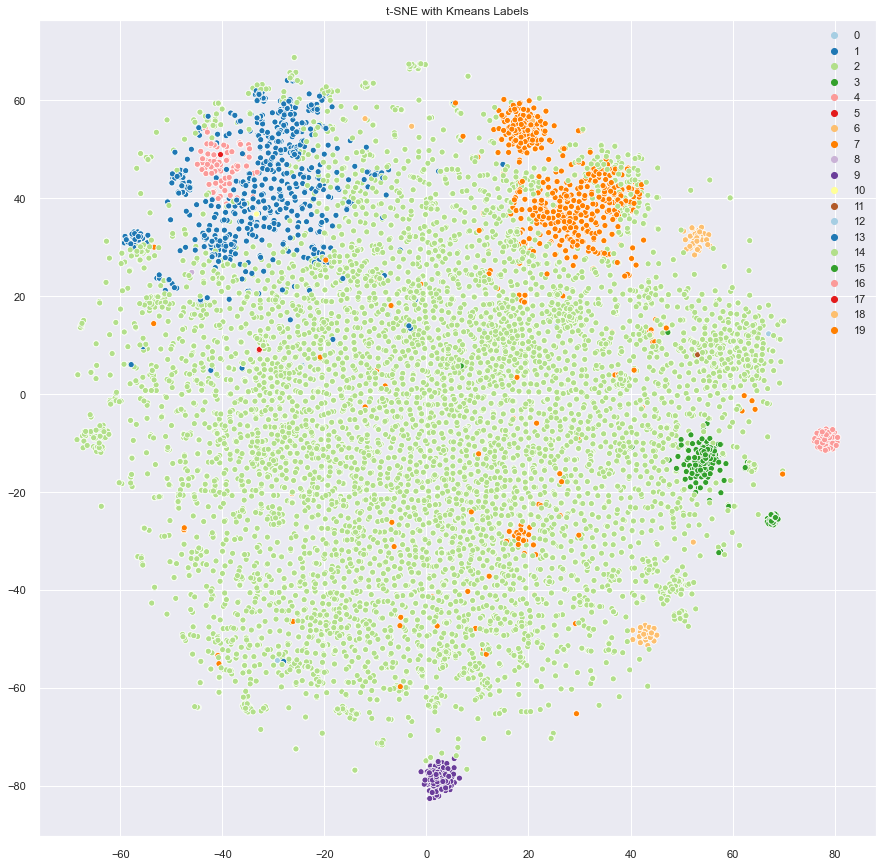

In [350]:
# Let's plot the 20 clusters we generated using KMeans
#sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("Paired", 20)

# plot
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue=k_means_clusters, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()

The labeled plot gives better insight into how the articles are grouped. The location of each article on the plot was determined by t-SNE while the label-color was determined by k-means. If we look at the plot where t-SNE has grouped articles into clusters, it shows that k-means was uniform in labeling that cluster (same color groups). This behavior shows that structure within the data can be observed and measured to some extent. However there are still a large number of articles that are spread out on the plot. This is a result of t-SNE and k-means finding different connections in the higher dimensional data. The topics of these articles often intersect so it hard to cleanly separate them, specially in our case since all the articles are relating to covid and many sources could cover similar news pertaining to single topic.

We can further use LDA for topic modeling to find most significant words in each cluster.

Additionally let's also visualize how the articles are spread out on a 2d plot based on its category we extracted using the source feature of NewsApi.

In [351]:
tsne_tfidf_df = pd.DataFrame(X_2d)
tsne_tfidf_df.columns = ['x', 'y']
tsne_tfidf_df['category'] = df_processed['category']
tsne_tfidf_df['combined_text'] = df_processed['combined_text']

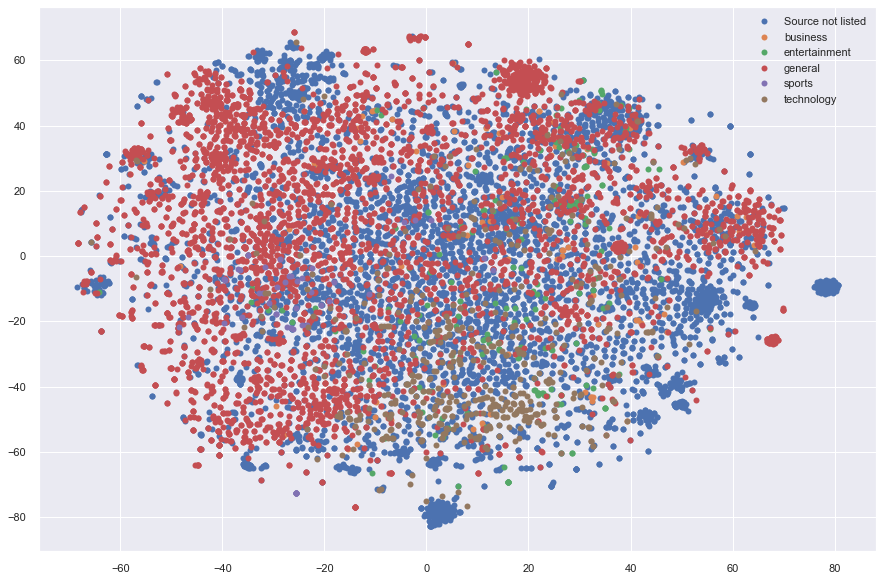

In [352]:
groups = tsne_tfidf_df.groupby('category')
fig, ax = plt.subplots(figsize=(15, 10))

for category, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', label=category)
ax.legend()
plt.show()


From the above plot we can see that most of the articles that are spread out belong to general category or the list where no category is available. This did not help the clustering algorithm as well as all the articles belonged to one topic, however the goal was to differentiate between categories.

Kmeans separates the documents into disjoint clusters. the assumption is that each cluster is attributed a single topic. However, descriptions may in reality be characterized by a "mixture" of topics. 

We will deal with this problem with the LDA algorithm.

### Topic Modeling on Each Cluster using LDA (Latent Dirichlet Allocation)

In [353]:
from sklearn.decomposition import LatentDirichletAllocation
import gensim.corpora as corpora
from gensim import matutils
from gensim.models import CoherenceModel
from tqdm import tqdm, tqdm_notebook
#tqdm.pandas(desc="progress-bar")

In [354]:
# Create a corpus and dictionary from the tokens

lda_copy = df_processed.copy()

bigram = gensim.models.Phrases(lda_copy['tokens'], min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
lda_copy['bigram_tokens'] = lda_copy['tokens'].progress_map(lambda tokens: bigram_mod[tokens])

id2word = corpora.Dictionary(lda_copy['bigram_tokens'])
texts = lda_copy['bigram_tokens'].values
corpus = [id2word.doc2bow(text) for text in texts]



progress-bar:   0%|                                                                          | 0/11161 [00:00<?, ?it/s]

progress-bar:   1%|▎                                                               | 62/11161 [00:00<00:18, 615.50it/s]

progress-bar:   4%|██▍                                                            | 442/11161 [00:00<00:13, 821.82it/s]

progress-bar:   7%|████▏                                                         | 754/11161 [00:00<00:09, 1054.15it/s]

progress-bar:  12%|███████▌                                                     | 1378/11161 [00:00<00:06, 1403.57it/s]

progress-bar:  18%|██████████▉                                                  | 1991/11161 [00:00<00:05, 1824.73it/s]

progress-bar:  24%|██████████████▉                                              | 2727/11161 [00:00<00:03, 2354.73it/s]

progress-bar:  30%|██████████████████▌                                          | 3398/11161 [00:00<00:02, 2921.33it/s]

progress-bar:  37%|███████████

In [355]:
#Exploring the new dataframe with bigram tokens
lda_copy

author  \
0      https://www.facebook.com/bbcnews   
1                       Nicole Gallucci   
2      https://www.facebook.com/bbcnews   
3                          Jody Serrano   
4                     Reuters Editorial   
...                                 ...   
11156                 Reuters Editorial   
11157                 Reuters Editorial   
11158                 Reuters Editorial   
11159                 Reuters Editorial   
11160                 Reuters Editorial   

                                                   title  \
0      Coronavirus: Three generations of Bollywood Ba...   
1      COVID-19 patient's last words to nurse: 'I tho...   
2      Coronavirus: South Africa bans alcohol sales a...   
3      Florida Records 15,000 New Covid-19 Cases in a...   
4      Bollywood's Bachchan tests positive for COVID-...   
...                                                  ...   
11156  Influential Libyan interior minister suspended...   
11157  Cricket-Australia 'blow cobwebs out' in rain-a...   
11158  Cricket: Australia 'blow cobwebs out' in rain-...   
11159  Cricket: Australia 'blow cobwebs out' in rain-...   
11160  China embassy says Britain is distorting Beiji...   

                                             description  \
0      Actress Aishwarya Rai Bachchan, her father-in-...   
1      As people across the United States continue to...   
2      It is one of several restrictions introduced b...   
3      Florida broke the nation’s covid-19 single-day...   
4      India's most famous actor, Amitabh Bachchan, a...   
...                                                  ...   
11156  The head of Libya's internationally recognised...   
11157  Australian wicketkeeper-batsman Matthew Wade w...   
11158  Australian wicketkeeper-batsman Matthew Wade w...   
11159  Australian wicketkeeper-batsman Matthew Wade w...   
11160  British politicians are twisting facts in orde...   

                                                     url  \
0      https://www.bbc.co.uk/news/world-asia-india-53...   
1      https://mashable.com/article/coronavirus-patie...   
2       https://www.bbc.co.uk/news/world-africa-53382797   
3      https://gizmodo.com/florida-records-15-000-new...   
4        https://www.reuters.com/video/watch/idOVCMIEUL9   
...                                                  ...   
11156  https://af.reuters.com/article/topNews/idAFKBN...   
11157  https://in.reuters.com/article/cricket-austral...   
11158  https://uk.reuters.com/article/uk-cricket-aust...   
11159  https://in.reuters.com/article/cricket-austral...   
11160  https://www.reuters.com/article/us-china-brita...   

                                              urlToImage publishedAt  \
0      https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
1      https://mondrian.mashable.com/2020%252F07%252F...  2020-07-12   
2      https://ichef.bbci.co.uk/news/1024/branded_new...  2020-07-12   
3      https://i.kinja-img.com/gawker-media/image/upl...  2020-07-12   
4      https://static.reuters.com/resources/r/?d=2020...  2020-07-12   
...                                                  ...         ...   
11156  https://s3.reutersmedia.net/resources/r/?m=02&...  2020-08-29   
11157  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11158  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11159  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   
11160  https://s4.reutersmedia.net/resources_v2/image...  2020-08-29   

                                                 content source.id  \
0      Image copyrightReutersImage caption\r\n Abhish...  bbc-news   
1      As people across the United States continue to...  mashable   
2      Image copyrightAFPImage caption\r\n This is th...  bbc-news   
3      Florida broke the nations covid-19 single-day ...       NaN   
4      Posted \r\nIndia's most famous actor, Amitabh ...   reuters   
...                                                  ...       ...  

In [356]:
# Function defining the LDA model that takes number of topics as a parameter
def LDA_model(num_topics, passes=1):
    return gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               eval_every=10,
                                               chunksize=2000,
                                               passes=passes,
                                               per_word_topics=True
                                            )

In [357]:
# Function to assess a good topic model by calculating the coherence score for number of topics to pick for training
def coherence_score(model):
    coherence = CoherenceModel(model=model, 
                           texts=lda_copy['bigram_tokens'].values,
                           dictionary=id2word, coherence='c_v')
    return coherence.get_coherence()

In [358]:
#Function to display topics and corresponding keywords
def display_topics(model):
    topics = model.show_topics(num_topics=model.num_topics, formatted=False, num_words=10)
    topics = map(lambda c: map(lambda cc: cc[0], c[1]), topics)
    df = pd.DataFrame(topics)
    df.index = ['topic_{0}'.format(i) for i in range(model.num_topics)]
    df.columns = ['keyword_{0}'.format(i) for i in range(1, 10+1)]
    return df

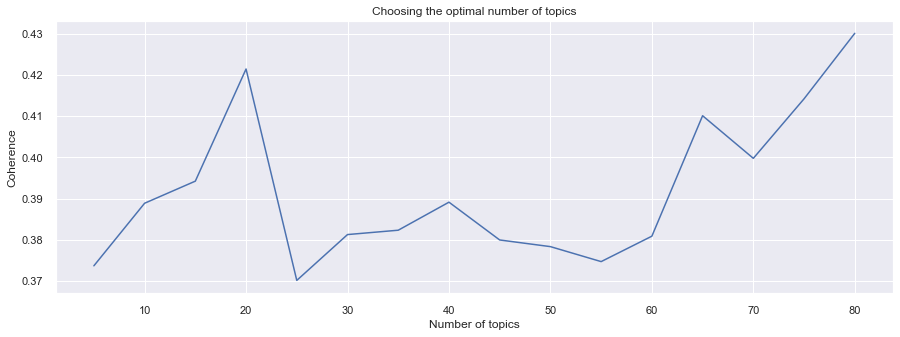

In [359]:
#Like Kmeans, we can vary the number of topics in an interval and pick the number that optimizes the coherence score.

def explore_models(df, rg=range(5, 25)):
    id2word = corpora.Dictionary(df['bigram_tokens'])
    texts = df['bigram_tokens'].values
    corpus = [id2word.doc2bow(text) for text in texts]

    models = []
    coherences = []
    
    for num_topics in tqdm_notebook(rg, leave=False):
        lda_model = LDA_model(num_topics, passes=5)
        models.append(lda_model)
        coherence = coherence_score(lda_model)
        coherences.append(coherence)
      

    fig = plt.figure(figsize=(15, 5))
    plt.title('Choosing the optimal number of topics')
    plt.xlabel('Number of topics')
    plt.ylabel('Coherence')
    plt.grid(True)
    plt.plot(rg, coherences)
    
    return coherences, models


coherences, models = explore_models(lda_copy, rg=range(5, 85, 5))

We are quite consistent with the KMeans approach where we chose 20 clusters based on elbow method and silhouette score. 20 seems to be a good number of topics, since it's a value after which the coherence stops increasing rapidly.

In [414]:
# Let's display the 20 topics and its associated keywords using the LDA_model function
best_model = LDA_model(num_topics=20, passes=5)

display_topics(model=best_model)

keyword_1      keyword_2         keyword_3  keyword_4   keyword_5  \
topic_0       health         public               new     people   officials   
topic_1      company            new               one      today       years   
topic_2        first            aug              make       cost        take   
topic_3       shares           find         australia      virus      stocks   
topic_4         said          world             cases    million         new   
topic_5        trump      president  president_donald      night         cnn   
topic_6         open            api              park    accused        slow   
topic_7         year         season              next     series        play   
topic_8   democratic  international          security       vote    research   
topic_9      disease       sars_cov          patients   business       study   
topic_10      school       students        convention       back       women   
topic_11       first           test           million      biden    positive   
topic_12    children         people           schools        one        kids   
topic_13      travel        germany           virtual     german  face_masks   
topic_14         oil          trade         questions      court     welcome   
topic_15         new          state              said      cases        city   
topic_16  university     california       researchers       show        beat   
topic_17     vaccine           news          vaccines  potential      canada   
topic_18        said          right              call  need_know   democrats   
topic_19         new          cases          reported     deaths      health   

               keyword_6     keyword_7       keyword_8     keyword_9  \
topic_0          zealand       england         general       testing   
topic_1            apple          time        facebook          last   
topic_2             turn         power           years        update   
topic_3           reopen       economy           fresh        closed   
topic_4              cdc  restrictions         country        friday   
topic_5   administration   white_house           would  donald_trump   
topic_6              set          face          little       process   
topic_7            first          team             due          fans   
topic_8             work        voters            like    california   
topic_9            small           buy      government        people   
topic_10             way        return          person        online   
topic_11       joe_biden          said           tests      campaign   
topic_12          family          home            many      hospital   
topic_13          people          mask          berlin    conference   
topic_14           title           tax         manager         green   
topic_15         country           day  prime_minister      outbreak   
topic_16            meet       program           texas          also   
topic_17       companies         china          trials       company   
topic_18           party         chief           would       parties   
topic_19           daily    infections         reports     confirmed   

         keyword_10  
topic_0        says  
topic_1        year  
topic_2        half  
topic_3       could  
topic_4    lockdown  
topic_5        news  
topic_6       cloud  
topic_7     players  
topic_8        sign  
topic_9   treatment  
topic_10       fall  
topic_11     course  
topic_12        say  
topic_13       stop  
topic_14  difficult  
topic_15   lockdown  
topic_16      major  
topic_17       deal  
topic_18   economic  
topic_19        day

From the above topic keywords, it is quite evident LDA did a very good job seperating the articles based on topic. These clusters/topics look more distinct from one another like
Topic 1: Tech industry;
Topic 4: Travel restrictions and lockdown;
Topic 5: Politics, Trump;
Topic 7: Sports;
Topic 10: Schools and academia;
Topic 13: German travel;
Topic 19: General covid updates.

Now that we know 20 topics is a good choice and LDA does a good job seperating the topics; let's go ahead and build a document/topic matrix.

In [362]:
# Let's built a document/topic matrix and use bokeh plot to visualize
def get_document_topic_matrix(corpus, num_topics=best_model.num_topics):
    matrix = []
    for row in tqdm_notebook(corpus):
        output = np.zeros(num_topics)
        doc_proba = best_model[row][0]
        for doc, proba in doc_proba:
            output[doc] = proba
        matrix.append(output)
    matrix = np.array(matrix)
    return matrix

matrix = get_document_topic_matrix(corpus) # A cell i,j is the probabily of topic j in the document i.

In [399]:
# LDA will give out number of topics for each document. The topic with highest probability will be assumed as document's topic
doc_topic = best_model.get_document_topics(corpus)
lda_keys = []
for i, desc in enumerate(df_processed['combined_text']):
    lda_keys.append(np.argmax(matrix[i, :]))

tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_lda = tsne_model.fit_transform(matrix)
lda_df = pd.DataFrame(tsne_lda, columns=['x', 'y'])
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(str)
lda_df['description'] = df_processed['description']
lda_df['category'] = df_processed['category']
lda_df.to_csv(r"C:\Users\asha2\Documents\Capstone Project 2\tsne_lda.csv", index=False, encoding='utf-8')



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 11161 samples in 0.109s...
[t-SNE] Computed neighbors for 11161 samples in 4.697s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11161
[t-SNE] Computed conditional probabilities for sample 2000 / 11161
[t-SNE] Computed conditional probabilities for sample 3000 / 11161
[t-SNE] Computed conditional probabilities for sample 4000 / 11161
[t-SNE] Computed conditional probabilities for sample 5000 / 11161
[t-SNE] Computed conditional probabilities for sample 6000 / 11161
[t-SNE] Computed conditional probabilities for sample 7000 / 11161
[t-SNE] Computed conditional probabilities for sample 8000 / 11161
[t-SNE] Computed conditional probabilities for sample 9000 / 11161
[t-SNE] Computed conditional probabilities for sample 10000 / 11161
[t-SNE] Computed conditional probabilities for sample 11000 / 11161
[t-SNE] Computed conditional probabilities for sample 11161 / 11161
[t-SNE] Mean sigma: 0.020052
[t-SNE] KL divergence

In [372]:
# Import all necessary libraries for bokeh visualization
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

In [400]:
# Visualize the articles based on topic clusters using Bokeh
reset_output()
output_notebook()
plot_lda = bp.figure(plot_width=700, plot_height=600, title="LDA classification of the Covid News",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

palette = d3['Category20'][20] + d3['Category20b'][20] 
color_map = bmo.CategoricalColorMapper(factors=lda_df['topic'].unique(), palette=palette)

plot_lda.scatter('x', 'y', source=lda_df, 
                    color={'field': 'topic', 'transform': color_map}, 
                    legend='topic')
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "topic": "@topic", "category": "@category"}

show(plot_lda)

Loading BokehJS ...

<img src="Bokeh.png"/>

With Bokeh, we assumed that a document's topic is the one that has the highest probability. But in this way we might have lost information as we did not consider about the topic distribution.

Please download the notebook to see an interactive visualization of Bokeh.

Hopefully pyLDAvis (visualization package) will help us solve this problem.

In [404]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(best_model, corpus, id2word)

pyLDAvis.save_html(panel, r"C:\Users\asha2\Documents\Capstone Project 2\pyLDAvis.html")

C:\Users\asha2\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


##### To find the interactive visualization, please open the html file provided: pyLDAvis.html

<img src="pyLDAvis.png"/>

Conclusion:

This project is an attempt to cluster published articles on COVID-19 and reduce the dimensionality of the dataset for visualization purposes. The dataset of articles was obtained from NewsApi. Clustering and dimensionality allowed for an interactive scatter plot of article topics related to covid-19 news which were grouped together based on similar theme. This helps people to quickly find material related to a central topic. The clustering of the data was done through k-means on a pre-processed, vectorized version of the article's text. As k-means simply split the data into clusters, topic modeling through LDA was performed to identify keywords. KMeans did not give distinct clusters and many keywords were common in lot of clusters. LDA was the right choice to extract the keywords and topics associated with those. The topics were distict and were useful in revealing patterns.